**Narzędzia - pandas**

*Biblioteka `pandas` zawiera wydajne i przystępne struktury danych i narzędzia analizy danych. Główną strukturą danych jest obiekt `DataFrame`, którą możemy interpretować jako przechowywaną w pamięci dwuwymiarową tabelę (przypominającą arkusz kalkulacyjny zawierający nazwy kolumn i etykiety wierszy). Dostępnych jest wiele funkcji spotykanych w aplikacji Excel, takich jak tworzenie tabeli przestawnych, obliczanie jednych kolumn na podstawie innych kolumn, rysowanie wykresów itd. Możemy również szeregować wiersze względem wartości w kolumnach lub łączyć tabele podobnie jak w bazach danych SQL. Ponadto moduł Pandas znakomicie sobie radzi z szeregami czasowymi.*

Wymogi wstępne:
* Moduł NumPy – jeśli nie korzystałaś/korzystałeś wcześniej z biblioteki NumPy, zalecam uprzednie zapoznanie się z [samouczkiem NumPy](narzędzia_numpy.ipynb).

# Konfiguracja
Upewnijmy się najpierw, że notatnik ten będzie działał w środowiskach Python 2 i 3:

In [1]:
from __future__ import division, print_function, unicode_literals

Importujmy teraz bibliotekę `pandas`. Większość osób importuje ją jako alias `pd`:

In [2]:
import pandas as pd

# Obiekty `Series`
Moduł `pandas` zawiera następujące struktury danych:
* obiekty `Series`, którymi się zajmiemy w pierwszej części notatnika. Obiekt `Series` jest jednowymiarową tablicą, przypominającą kolumnę w arkuszu kalkulacyjnym (zawierającą nazwę kolumny i etykiety wierszy),
* obiekty `DataFrame`. Są to dwuwymiarowe tablice przypominające arkusz kalkulacyjny (zawierające nazwy kolumn i etykiety wierszy),
* obiekty `Panel`. Możemy je interpretować jako słowniki obiektów `DataFrame`. Są one rzadziej używane, dlatego nie będziemy ich tu omawiać.

## Tworzenie obiektu `Series`
Zacznijmy od stworzenia naszego pierwszego obiektu `Series`!

In [3]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Podobieństwa do jednowymiarowej tablicy `ndarray`
Obiekty `Series` działają podobnie, jak jednowymiarowe tablice `ndarray` modułu NumPy; ponadto często możemy przekazywać je jako parametry funkcji NumPy:

In [4]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Możliwe jest również wykonywanie operacji arytmetycznych na obiektach `Series`; są one przeprowadzane *po współrzędnych*, podobnie jak w obiektach `ndarray`:

In [5]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Podobnie, jak w przypadku tabel `ndarray` możemy dodawać pojedyncza liczbę do obiektu `Series` - jest ona dodawana do wszystkich elementów obiektu `Series`. Proces ten nazywamy *rozgłaszaniem*:

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

To samo dotyczy również wszystkich operacji binarnych, takich jak `*` czy `/`, a nawet instrukcji warunkowych:

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Etykiety indeksu
Każdy element obiektu `Series` zawiera niepowtarzalny identyfikator zwany *etykietą indeksu*. Domyślnie określa ona po prostu rangę elementu w obiekcie `Series` (począwszy od wartości `0`), możemy również jednak własnoręcznie wyznaczać etykiety indeksu:

In [8]:
s2 = pd.Series([68, 83, 112, 68], index=["alicja", "bob", "karol", "darwin"])
s2

alicja     68
bob        83
karol     112
darwin     68
dtype: int64

Możemy również korzystać z obiektu `Series` jak ze słownika `dict`:

In [9]:
s2["bob"]

83

Nic nie stoi na przeszkodzie, aby uzyskiwać dostęp do elementów podając ich pozycję w postaci liczby całkowitej, podobie jak w standardowej tablicy:

In [10]:
s2[1]

83

Aby dać jasno do zrozumienia, czy uzyskujemy dostęp do danych za pomocą etykiety lub liczby całkowitej, zalecane jest korzystanie z atrybutu `loc` w przypadku używania etykiety i atrybutu `iloc` dla indeksu liczbowego:

In [11]:
s2.loc["bob"]

83

In [12]:
s2.iloc[1]

83

Podzielenie obiektu `Series` dzieli również etykiety indeksu:

In [13]:
s2.iloc[1:3]

bob       83
karol    112
dtype: int64

Może to prowadzić do nieoczekiwanych rezultatów podczas korzystania z domyślnych etykiet numerycznych, dlatego zachowaj ostrożność:

In [14]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [15]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Ojej! Pierwszy element ma etykietę indeksu o wartości `2`. Zaginął nam element z etykietą indeksu o wartości `0`:

In [16]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Błąd klucza:", e)

Błąd klucza: 0


Pamiętaj jednak, że możesz uzyskiwać dostęp do elementów za pomocą atrybutu `iloc` (wartość liczbowa). Jest to kolejny powód, dla którego zawsze lepiej jest używać atrybutów `loc` i `iloc` w celu uzyskiwania dostępu do obiektów `Series`:

In [17]:
surprise_slice.iloc[0]

1002

## Inicjacja za pomocą obiektu `dict`
Możemy tworzyć obiekt `Series` z obiektu `dict`. Klucze zostaną przekształcone w etykiety indeksu:

In [18]:
weights = {"alicja": 68, "bob": 83, "czesław": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alicja     68
bob        83
czesław    86
darwin     68
dtype: int64

Możemy kontrolować dołączanie elementów do obiektu `Series`, a także kolejnością ich występowania poprzez jawne zdefiniowanie parametru `index`:

In [19]:
s4 = pd.Series(weights, index = ["czesław", "alicja"])
s4

czesław    86
alicja     68
dtype: int64

## Automatyczne rozmieszczanie
Gdy w danej operacji wykorzystywanych jest wiele obiektów `Series`, moduł pandas automatycznie rozmieszcza ich elementy dopasowując ich etykiety indeksu.

In [20]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alicja', 'bob', 'karol', 'darwin'], dtype='object')
Index(['alicja', 'bob', 'czesław', 'darwin'], dtype='object')


alicja     136.0
bob        166.0
czesław      NaN
darwin     136.0
karol        NaN
dtype: float64

Uzyskany obiekt `Series` zawiera sumę etykietów indeksu z obiektów `s2` i `s3`. ELementu `"czesław"` nie ma w obiekcie `s2`, a `"karol"` - w obiekcie `s3`, zostaje im przypisana wartość `NaN`. (czyli "Not-a-Number", oznaczająca w wolnym tłumaczeniu *nieobecna*).

Automatyczne rozmieszczanie przydaje się bardzo podczas pracy z danymi pochodzącymi z różnych źródeł, której mogą mieć odmienną strukturę i brakujące elementy. Jeśli jednak zapomnisz wyznaczyć właściwe etykiety indeksu, uzyskiwane wyniki mogą Cię zaskoczyć:

In [21]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


C:\Users\Krzysztof\Anaconda3\lib\site-packages\pandas\indexes\base.py:2683: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


alicja   NaN
bob      NaN
karol    NaN
darwin   NaN
0        NaN
1        NaN
2        NaN
3        NaN
dtype: float64

Moduł pandas nie mógł powiązać obiektów `Series`, ponieważ ich etykiety zupełnie do siebie nie pasują, stąd wynik wypełniony wartościami `NaN`.

## Inicjacja za pomocą wartości skalarnej
Możemy również inicjować obiekt `Series` za pomocą wartości skalarnej i listy etykiet indeksu: wszystkim elementom zostanie wyznaczona ten skalar.

In [22]:
meaning = pd.Series(42, ["życie", "wszechświat", "wszystko"])
meaning

życie          42
wszechświat    42
wszystko       42
dtype: int64

## Nazwa obiektu `Series`
A `Series` can have a `name`:

In [23]:
s6 = pd.Series([83, 68], index=["bob", "alicja"], name="wagi")
s6

bob       83
alicja    68
Name: wagi, dtype: int64

## Wykres obiektu `Series`
Moduł Pandas umożliwia rysowanie wykresu danych `Series` za pomocą biblioteki matplotlib (więcej informacji na temat modułu matplotlib znajdziesz w [samouczku matplotlib](narzędzia_matplotlib.ipynb)). Wystarczy importować ją i wywołać metodę `plot()`:

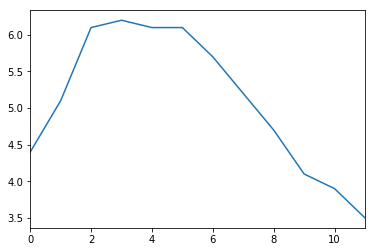

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperatura")
s7.plot()
plt.show()

Dostępnych jest *wiele* opcji rysowania wykresów danych. Nie ma potrzeby wymieniać tu wszystkich możliwości: jeśli potrzebujesz określonego rodzaju wykresu (histogramu, wykresu kołowego itd.), wystarczy zajrzeć do doskonałej sekcji [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) stanowiącej część dokumentacji modułu pandas i przeanalizować umieszczony tam przykładowy kod.

# Obsługa danych czasowych
Wiele zestawów danych zawiera znaczniki czasowe, a moduł pandas świetnie sobie radzi z ich obsługą:
* może przedstawiać okresy (np. kwartały) i częstotliwości (takie jak "co miesiąc"),
* może przekształcać okresy do postaci rzeczywistych znaczników czasowych i odwrotnie,
* może przepróbkowywać dane i gromadzić wartości w dowolny sposób,
* obsługuje funkcję stref czasowych.

## Przedziały czasowe
Zacznijmy od stworzenia szeregu czasowego za pomocą funkcji `pd.date_range()`. Zostaje zwrócony obiekt `DatetimeIndex` zawierający po jednej wartości DataGodzina do godzinę przez 12 godzin, począwszy od godziny 17:30 dnia 29 października 2016 roku:

In [25]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

Ten obiekt `DatetimeIndex` może być użyty jako indeks w obiekcie `Series`:

In [26]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

Narysujmy wykres tego szeregu czasowego:

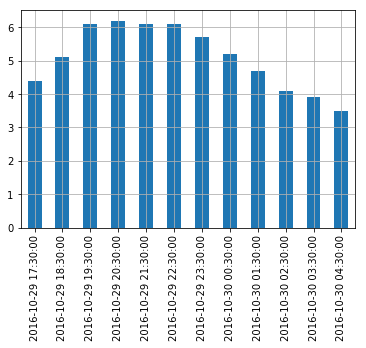

In [27]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## Przepróbkowanie
Moduł Pandas pozwala w prosty sposób przepróbkować szereg czasowy. Wystarczy wywołać metodę `resample()` i określić nową częstotliwość:

In [28]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0]

Operacja przepróbkowania jest w rzeczywistości opóźniana, dlatego właśnie nie otrzymaliśmy obiektu `Series`, lecz `DatetimeIndexResampler`. Aby przeprowadzić właściwą operację przepróbkowania, wystarczy wyołać metodę `mean()`: moduł Pandas obliczy średnią z każdej pary następujących po sobie godzin:

In [29]:
temp_series_freq_2H = temp_series_freq_2H.mean()

Sprawdźmy rezultat na wykresie:

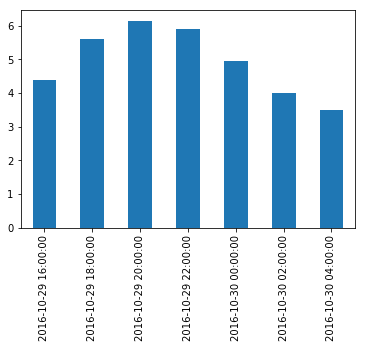

In [30]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Zwróć uwagę, że wartości zostały automatyczne zebrane w dwugodzinne okresy. Na przykład jeśli przyjrzymy się okresowi od godziny 18 do 20 zauważymy, że o 18:60 wartość była równa `5,1`, a o 19:30 - `6,1`. Po przepróbkowaniu otrzymujemy tylko jedną wartość - `5,6`, czyli średnią z wartości `5,1` i `6,1`. Zamiast obliczać średnią moglibyśmy skorzystać z dowolnej innej funkcji agregującej; przykładowo możemy zdecydować się pozostawiać wartość minimalną z każdego okresu:

In [31]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

To samo możemy uzyskać za pomocą metody `apply()`:

In [32]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Zwiększenie częstotliwości próbkowania i interpolacja
Był to przykład zmniejszania częstotliwości próbkowania. Możemy również zwiększać tę częstotliwość, pojawiają się jednak wtedy "dziury" w danych:

In [33]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # metoda `head` wyświetla n pierwszych wartości

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

Jednym z rozwiązań jest uzupełnienie braków za pomocą interpolacji. Wystarczy w tym celu wywołać metodę `interpolate()`. Domyślnie stosowana jest interpolacja liniowa, możemy jednak wybrać inny algorytm, na przykład interpolacji sześciennej:

In [34]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.430644
2016-10-29 18:00:00    4.582074
2016-10-29 18:15:00    4.817467
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.394958
2016-10-29 19:00:00    5.676060
2016-10-29 19:15:00    5.919132
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.202023
Freq: 15T, dtype: float64

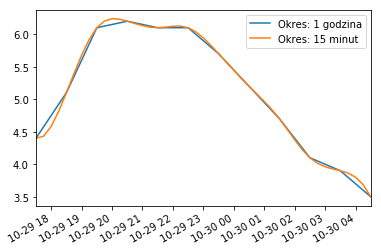

In [35]:
temp_series.plot(label="Okres: 1 godzina")
temp_series_freq_15min.plot(label="Okres: 15 minut")
plt.legend()
plt.show()

## Strefy czasowe
Strefy czasowe są domyślnie *naiwne*: moduł pandas nie wie, jaka jest dana strefa czasowa, dlatego data 2016-10-30 02:30 może oznaczać godzinę 2:30 dnia 30 października 2016 roku zarówno w Paryżu, jak i w Nowym Jorku. Możemy włączyć *świadomość* strefy czasowej za pomocą metody `tz_localize()`:

In [36]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

Zwróć uwagę, że został człon `-04:00` do wszystkich elementów czasowych. Oznacza to, że odnoszą się one do czasu [UTC](https://pl.wikipedia.org/wiki/Uniwersalny_czas_koordynowany) - 4 godziny.

Możemy przekształcić tę strefę czasową do występujące w Paryżu następująco:

In [37]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

Pewnie zauważyłaś/zauważyłeś, że przesunięcie czasu zostało zmienione z `+02:00` na `+01:00`: wynika to z faktu, że Francja przechodzi na czas zimowy tego dnia o godzinie 3 nad ranem (czas zostaje cofnięty do godziny 2). Zwróć uwagę, że godzina 2:30 pojawia się dwukrotnie! Wróćmy do "naiwnej" reprezentacji (jeśli zapiszesz jakieś dane lokalne korzystając z czasu lokalnego bez zapisywania strefy czasowej, uzyskasz coś następującego):

In [38]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
Freq: H, dtype: float64

Teraz godzina `02:30` naprawdę wprowadza zamieszanie. Jeżeli spróbujemy dostosować te "naiwne" strefy czasowe do strefy czasowej Paryża, pojawi się komunikat o błędzie:

In [39]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from Timestamp('2016-10-30 02:30:00'), try using the 'ambiguous' argument


Na szczęście dzięki argumentowi `ambiguous` możemy sprawić, że moduł pandas wywnioskuje prawidłowy czas letni na podstawie kolejności tych niejednoznacznych znaczników czasowych:

In [40]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

## Okresy
Funkcja `pd.period_range()` zwraca obiekt `PeriodIndex` zamiast obiektu `DatetimeIndex`. Uzyskajmy, na przykład, wszystkie kwartały w latach 2016 i 2017:

In [41]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Dodanie liczby `N` do obiektu `PeriodIndex` przesuwa okresy o `N` razy częstotliwość obiektu `PeriodIndex`:

In [42]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Metoda `asfreq()` pozwala nam zmienić częstotliwość obiektu `PeriodIndex`. Wszystkie okresy zostają odpowiednio wydłużone lub skrócone. Na przykład, przekonwertujmy wszystkie kwartały do postaci miesięcy (przybliżanie):

In [43]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

Domyślnie metoda `asfreq` koncentruje się na końcu każdego okresu. Możemy zmienić to zachowanie i sprawić, żeby koncentorwała się na początku każdego okresu:

In [44]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

A teraz sprawdźmy oddalanie:

In [45]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]', freq='A-DEC')

Możemy, oczywiście, stworzyć obiekt `Series` zawierający `PeriodIndex`:

In [46]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

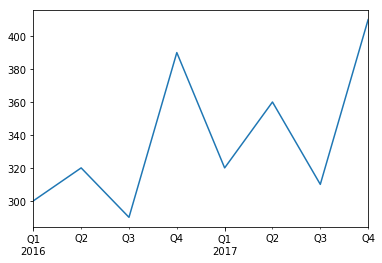

In [47]:
quarterly_revenue.plot(kind="line")
plt.show()

Możemy przekształcić okresy do postaci znaczników czasowych wywołując metodę `to_timestamp`. Domyślnie otrzymamy w ten sposób pierwszy dzień każdego okresu, ale za pomocą atrybutów `how` i `freq`, możemy z kolei uzyskać ostatnią godzinę każdego okresu:

In [48]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-03-31 23:00:00    300
2016-06-30 23:00:00    320
2016-09-30 23:00:00    290
2016-12-31 23:00:00    390
2017-03-31 23:00:00    320
2017-06-30 23:00:00    360
2017-09-30 23:00:00    310
2017-12-31 23:00:00    410
Freq: Q-DEC, dtype: int64

A teraz wracamy do okresów przy użyciu metody `to_period`:

In [49]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Moduł pandas zawiera wiele innych funkcji związanych z czasem, które zostały wyczerpującą opisane w [dokumentacji](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). Aby rozbudzić Twój apetyt, poniżej przedstawiam jeden ze sposobów wyświetlania ostatniego dnia roboczego w każdym miesiącu 2016 roku (dla godziny 9 rano):

In [50]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

# Obiekty `DataFrame`
Obiekt DataFrame reprezentuje arkusz kalkulacyjny zawierający wartości komórek, nazwy kolumn i etykiety indeksu wierszy. Możemy definiować wyrażenia obliczające wartości kolumn na podstawie innych kolumn, tworzyć tabele przesuwne, grupować wiersze, rysować wykresy itd. Możemy uznać obiekty `DataFrame` jako słowniki obiektów `Series`.

## Tworzenie obiektu `DataFrame`
Możemy stworzyć obiekt DataFrame przekazując słownik obiektów `Series`:

In [54]:
people_dict = {
    "waga": pd.Series([68, 83, 112], index=["alicja", "bob", "karol"]),
    "rok urodzenia": pd.Series([1984, 1985, 1992], index=["bob", "alicja", "karol"], name="rok"),
    "dzieci": pd.Series([0, 3], index=["karol", "bob"]),
    "zainteresowania": pd.Series(["Rowery", "Taniec"], index=["alicja", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,dzieci,rok urodzenia,waga,zainteresowania
alicja,NaN,1985,68,Rowery
bob,3.0,1984,83,Taniec
karol,0.0,1992,112,NaN


Kilka uwag do odnotowania:
* obiekty `Series` zostały automatycznie przyporządkowane na podstawie ich indeksów, 
* brakujące dane są oznaczane wartością `NaN`,
* nazwy obiektów `Series` są ignorowane (nazwa `"rok"` została pominięta),
* obiekty `DataFrame` są bardzo elegancko wyświetlane w notatnikach Jupyter. Juhuu!

Sposób uzyskania dostępu do kolumn jest dość oczywisty. Są one zwracane jako obiekty `Series`:

In [55]:
people["rok urodzenia"]

alicja    1985
bob       1984
karol     1992
Name: rok urodzenia, dtype: int64

Możemy również uzyskać dostęp do wielu kolumn jednocześnie:

In [56]:
people[["rok urodzenia", "zainteresowania"]]

,rok urodzenia,zainteresowania
alicja,1985,Rowery
bob,1984,Taniec
karol,1992,NaN


Jeśli przekażesz listę kolumn i/lub etykiety indeksu wierszy konstruktorowi obiektu `DataFrame`, to będą istnieć tylko te kolumny i/lub wiersze w wyznaczonej kolejności. Na przykład:

In [57]:
d2 = pd.DataFrame(
        people_dict,
        columns=["rok urodzenia", "waga", "wzrost"],
        index=["bob", "alicja", "eugeniusz"]
     )
d2

,rok urodzenia,waga,wzrost
bob,1984.0,83.0,NaN
alicja,1985.0,68.0,NaN
eugeniusz,NaN,NaN,NaN


Innym wygodnym sposobem uwtorzenia obiektu `DataFrame` jest przekazanie wszystkich wartości konstruktorowi w postaci tablicy `ndarray` (lub listy list), a następnie osobno określając nazwy kolumn i etykiety indeksu wierszy:

In [58]:
values = [
            [1985, np.nan, "Rowery",   68],
            [1984, 3,      "Taniec",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["rok urodzenia", "dzieci", "zainteresowania", "waga"],
        index=["alicja", "bob", "karol"]
     )
d3

,rok urodzenia,dzieci,zainteresowania,waga
alicja,1985,NaN,Rowery,68
bob,1984,3.0,Taniec,83
karol,1992,0.0,NaN,112


Aby określić brakujące wartości, możesz skorzystać z metody `np.nan` albo ukrytych tablic modułu NumPy:

In [59]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["rok urodzenia", "dzieci", "zainteresowania", "wagi"],
        index=["alicja", "bob", "karol"]
     )
d3

,rok urodzenia,dzieci,zainteresowania,wagi
alicja,1985,NaN,Rowery,68
bob,1984,3,Taniec,83
karol,1992,0,NaN,112


Zamiast tablicy `ndarray` możesz przekazać obiekt `DataFrame`:

In [60]:
d4 = pd.DataFrame(
         d3,
         columns=["zainteresowania", "dzieci"],
         index=["alicja", "bob"]
     )
d4

,zainteresowania,dzieci
alicja,Rowery,NaN
bob,Taniec,3


Możliwe jest także stworzenie obiektu `DataFrame` ze słownikiem (lub listą) słowników (lub listą):

In [61]:
people = pd.DataFrame({
    "rok urodzenia": {"alicja":1985, "bob": 1984, "karol": 1992},
    "zainteresowania": {"alicja":"Rowery", "bob": "Taniec"},
    "waga": {"alicja":68, "bob": 83, "karol": 112},
    "dzieci": {"bob": 3, "karol": 0}
})
people

,dzieci,rok urodzenia,waga,zainteresowania
alicja,NaN,1985,68,Rowery
bob,3.0,1984,83,Taniec
karol,0.0,1992,112,NaN


## Wieloindeksowość 
Jeśli wszystkie kolumny są krotkami o takim samym rozmiarze, to uznajemy je za wieloindeksowe. To samo dotyczyczy etykiet indeksu rzędów. Na przykład:

In [62]:
d5 = pd.DataFrame(
  {
    ("publiczne", "rok urodzenia"):
        {("Paryż","alicja"):1985, ("Paryż","bob"): 1984, ("Londyn","karol"): 1992},
    ("publiczne", "zainteresowania"):
        {("Paryż","alicja"):"Rowery", ("Paryż","bob"): "Taniec"},
    ("prywatne", "waga"):
        {("Paryż","alicja"):68, ("Paryż","bob"): 83, ("Londyn","karol"): 112},
    ("prywatne", "dzieci"):
        {("Paryż", "alicja"):np.nan, ("Paryż","bob"): 3, ("Londyn","karol"): 0}
  }
)
d5

prywatne          publiczne                
                dzieci waga rok urodzenia zainteresowania
Londyn karol       0.0  112          1992             NaN
Paryż  alicja      NaN   68          1985          Rowery
       bob         3.0   83          1984          Taniec

Teraz możemy w bardzo prosty sposób uzyskać obiekt `DataFrame` zawierający wszystkie kolumny `"publiczne"`:

In [63]:
d5["publiczne"]

rok urodzenia zainteresowania
Londyn karol            1992             NaN
Paryż  alicja           1985          Rowery
       bob              1984          Taniec

In [64]:
d5["publiczne", "zainteresowania"]  # To samo, co d5["publiczne"]["zainteresowania"]

Londyn  karol        NaN
Paryż   alicja    Rowery
        bob       Taniec
Name: (publiczne, zainteresowania), dtype: object

## Usuwanie poziomu
Przyjrzyjmy się jeszcze raz obiektowi `d5`:

In [65]:
d5

prywatne          publiczne                
                dzieci waga rok urodzenia zainteresowania
Londyn karol       0.0  112          1992             NaN
Paryż  alicja      NaN   68          1985          Rowery
       bob         3.0   83          1984          Taniec

Istnieją dwa poziomy kolumn i dwa poziomy indeksów. Możemy usunąć poziom kolumny wywołując metodę `droplevel()` (to samo dotyczy indeksów):

In [66]:
d5.columns = d5.columns.droplevel(level = 0)
d5

dzieci  waga  rok urodzenia zainteresowania
Londyn karol      0.0   112           1992             NaN
Paryż  alicja     NaN    68           1985          Rowery
       bob        3.0    83           1984          Taniec

## Transpozycja
Możemy zamienić miejscami kolumny i rzędy za pomocą atrybutu `T`:

In [67]:
d6 = d5.T
d6

Londyn   Paryż        
                 karol  alicja     bob
dzieci               0     NaN       3
waga               112      68      83
rok urodzenia     1992    1985    1984
zainteresowania    NaN  Rowery  Taniec

## Tworzenie i rozdzielanie stosów poziomów
Wywołanie metody `stack()` powoduje umieszczenie najniższego poziomu kolumny zaraz za najniższym indeksem:

In [68]:
d7 = d6.stack()
d7

Londyn   Paryż
dzieci          bob       NaN       3
                karol       0     NaN
waga            alicja    NaN      68
                bob       NaN      83
                karol     112     NaN
rok urodzenia   alicja    NaN    1985
                bob       NaN    1984
                karol    1992     NaN
zainteresowania alicja    NaN  Rowery
                bob       NaN  Taniec

Zwróć uwagę, że pojawiło się wiele wartości `NaN`. Jest to logiczne, ponieważ nie istniało wcześniej wiele nowych kombinacji (np. nie było Boba w Londynie).

Wywołanie metody `unstack()` odwróci ten efekt, przez co znowu pojawi się wiele wartości `NaN`.

In [69]:
d8 = d7.unstack()
d8

Londyn              Paryż              
                alicja  bob karol  alicja     bob karol
dzieci            None  NaN     0    None       3   NaN
waga               NaN  NaN   112      68      83   NaN
rok urodzenia      NaN  NaN  1992    1985    1984   NaN
zainteresowania    NaN  NaN  None  Rowery  Taniec  None

Jeśli ponownie wywołamy metodę `unstack`, otrzymamy obiekt `Series`:

In [70]:
d9 = d8.unstack()
d9

Londyn  alicja  dzieci               None
                waga                  NaN
                rok urodzenia         NaN
                zainteresowania       NaN
        bob     dzieci                NaN
                waga                  NaN
                rok urodzenia         NaN
                zainteresowania       NaN
        karol   dzieci                  0
                waga                  112
                rok urodzenia        1992
                zainteresowania      None
Paryż   alicja  dzieci               None
                waga                   68
                rok urodzenia        1985
                zainteresowania    Rowery
        bob     dzieci                  3
                waga                   83
                rok urodzenia        1984
                zainteresowania    Taniec
        karol   dzieci                NaN
                waga                  NaN
                rok urodzenia         NaN
                zainteresowania   

Metody `stack()` i `unstack()` pozwalają wybrać również `level` (poziom), który ma być umieszczony w stosie lub z niego zdjęty. Możesz nawet tworzyć/usuwać stosy z wielu poziomów naraz:

In [71]:
d10 = d9.unstack(level = (0,1))
d10

Londyn              Paryż              
                alicja  bob karol  alicja     bob karol
dzieci            None  NaN     0    None       3   NaN
waga               NaN  NaN   112      68      83   NaN
rok urodzenia      NaN  NaN  1992    1985    1984   NaN
zainteresowania    NaN  NaN  None  Rowery  Taniec  None

## Większość metod zwraca zmodyfikowane kopie
Jak już pewnie zauważyłaś/zauważyłeś, metody `stack()` i `unstack()` nie modyfikują obiektów, wobec których są stosowane. Zamiast tego przetwarzają kopię i zwracają ją. Dotyczy to również większości metod modułu pandas.

## Dostęp do wierszy
Wróćmy do obiektu `people`:

In [72]:
people

,dzieci,rok urodzenia,waga,zainteresowania
alicja,NaN,1985,68,Rowery
bob,3.0,1984,83,Taniec
karol,0.0,1992,112,NaN


Atrybut `loc` pozwala uzyskiwać dostęp do wierszy zamiast kolumn. W wyniku tego otrzymujemy obiekt `Series`, w którym nazwy kolumn obiektu `DataFrame` są odwzorowywane na etykiety indeksu rzędów:

In [73]:
people.loc["karol"]

dzieci                0
rok urodzenia      1992
waga                112
zainteresowania     NaN
Name: karol, dtype: object

Możemy również uzyskać dostęp do wierszy za pomocą indeksu liczbowego (atrybut `iloc`):

In [74]:
people.iloc[2]

dzieci                0
rok urodzenia      1992
waga                112
zainteresowania     NaN
Name: karol, dtype: object

Możemy również wybierać fragmenty wierszy, co spowoduje zwrócenie obiektu `DataFrame`:

In [75]:
people.iloc[1:3]

,dzieci,rok urodzenia,waga,zainteresowania
bob,3.0,1984,83,Taniec
karol,0.0,1992,112,NaN


Na koniec możemy przekazać tablicę zerojedynkową w celu uzyskania odpowiednich wierszy:

In [76]:
people[np.array([True, False, True])]

,dzieci,rok urodzenia,waga,zainteresowania
alicja,NaN,1985,68,Rowery
karol,0.0,1992,112,NaN


Rozwiązanie to jest najskuteczniejsze w połączeniu z wyrażeniami zerojedynkowymi:

In [77]:
people[people["rok urodzenia"] < 1990]

,dzieci,rok urodzenia,waga,zainteresowania
alicja,NaN,1985,68,Rowery
bob,3.0,1984,83,Taniec


## Dodawanie i usuwanie kolumn
Generalnie możemy traktować obiekty `DataFrame` jako słowniki obiektów `Series`, zatem poniższa technika będzie prawidłowo działać:

In [78]:
people

,dzieci,rok urodzenia,waga,zainteresowania
alicja,NaN,1985,68,Rowery
bob,3.0,1984,83,Taniec
karol,0.0,1992,112,NaN


In [79]:
people["wiek"] = 2018 - people["rok urodzenia"]  # dodaje nową kolumnę: "wiek"
people["powyżej 30 lat"] = people["wiek"] > 30      # dodaje jeszcze jedną kolumną: "powyżej 30 lat"
birthyears = people.pop("rok urodzenia")
del people["dzieci"]

people

,waga,zainteresowania,wiek,powyżej 30 lat
alicja,68,Rowery,33,True
bob,83,Taniec,34,True
karol,112,NaN,26,False


In [80]:
birthyears

alicja    1985
bob       1984
karol     1992
Name: rok urodzenia, dtype: int64

Nowa kolumna musi zawierać taką samą liczbę wierszy. Brakujące wiersze wypełniane są wartościami NaN, natomiast nadmiarowe wiersze są ignorowane:

In [81]:
people["zwierzaki"] = pd.Series({"bob": 0, "karol": 5, "eugeniusz":1})  # brakuje alicji, eugeniusz jest ignorowany
people

,waga,zainteresowania,wiek,powyżej 30 lat,zwierzaki
alicja,68,Rowery,33,True,NaN
bob,83,Taniec,34,True,0.0
karol,112,NaN,26,False,5.0


Domyślnie nowa kolumna jest umieszczana na końcu (po prawej stronie). Za pomocą metody `insert()` możemy ją wstawiać w dowolnym miejscu:

In [82]:
people.insert(1, "wzrost", [172, 181, 185])
people

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki
alicja,68,172,Rowery,33,True,NaN
bob,83,181,Taniec,34,True,0.0
karol,112,185,NaN,26,False,5.0


## Przydzielanie nowych kolumn
Możemy również tworzyć nowe kolumny wywołując metodę `assign()`. Zwróć uwagę, że jest zwracany nowy obiekt `DataFrame`, pierwotny zaś pozostaje niezmodyfikowany:

In [83]:
people.assign(
    body_mass_index = people["waga"] / (people["wzrost"] / 100) ** 2,
    has_pets = people["zwierzaki"] > 0
)

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index,has_pets
alicja,68,172,Rowery,33,True,NaN,22.985398,False
bob,83,181,Taniec,34,True,0.0,25.335002,False
karol,112,185,NaN,26,False,5.0,32.724617,True


Zwróć uwagę, że nie możesz uzyskać dostępu do kolumn stworzonych w ramach tego samego przydziału:

In [84]:
try:
    people.assign(
        body_mass_index = people["waga"] / (people["wzrost"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Błąd klucza:", e)

Błąd klucza: 'body_mass_index'


Rozwiązaniem okazuje się podzielenie tego przydziału na dwa pomniejsze, następujące po sobie przydziały:

In [85]:
d6 = people.assign(body_mass_index = people["waga"] / (people["wzrost"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index,overweight
alicja,68,172,Rowery,33,True,NaN,22.985398,False
bob,83,181,Taniec,34,True,0.0,25.335002,True
karol,112,185,NaN,26,False,5.0,32.724617,True


Stworzenie tymczasowej zmiennej `d6` nie jest zbyt wygodne. Możesz chcieć po prostu stworzyć sekwencję wywołań przydziałów, ale to nie zadziała, ponieważ obiekt `people` w rzeczywistości nie został zmodyfikowany przez pierwszy przydział:

In [86]:
try:
    (people
         .assign(body_mass_index = people["waga"] / (people["wzrost"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Błąd klucza:", e)

Błąd klucza: 'body_mass_index'


Bez obaw, istnieje proste rozwiązanie. Możesz przekazać funkcję do metodzie `assign()` (zazwyczaj funkcji `lambda`) i zostanie ona wywołana z obiektem `DataFrame` jako parametrem:

In [87]:
(people
     .assign(body_mass_index = lambda df: df["waga"] / (df["wzrost"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index,overweight
alicja,68,172,Rowery,33,True,NaN,22.985398,False
bob,83,181,Taniec,34,True,0.0,25.335002,True
karol,112,185,NaN,26,False,5.0,32.724617,True


Problem rozwiązany!

## Ocena wyrażeń
Ocenianie wyrażeń stanowi znakomitą funkcję modułu pandas. Wykorzystywana jest tu biblioteka `numexpr`, którą należy zainstalować.

In [88]:
people.eval("waga / (wzrost/100) ** 2 > 25")

alicja    False
bob        True
karol      True
dtype: bool

Obsługiwane są również wyrażenia przydzielania. Wprowadźmy parametr `inplace=True` w celu bezpośredniego modyfikowania obiektu `DataFrame`, a nie jego kopii:

In [89]:
people.eval("body_mass_index = waga / (wzrost/100) ** 2", inplace=True)
people

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index
alicja,68,172,Rowery,33,True,NaN,22.985398
bob,83,181,Taniec,34,True,0.0,25.335002
karol,112,185,NaN,26,False,5.0,32.724617


Możemy używać lokalnej lub globalnej zmiennej w wyrażeniu wprowadzając przed nią prefiks `'@'`:

In [90]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index,overweight
alicja,68,172,Rowery,33,True,NaN,22.985398,False
bob,83,181,Taniec,34,True,0.0,25.335002,False
karol,112,185,NaN,26,False,5.0,32.724617,True


## Kwerendy obiektu `DataFrame`
Metoda `query()` umożliwia filtrowanie obiektu `DataFrame` na podstawie wyrażenia kwerendy:

In [91]:
people.query("wiek > 30 and zwierzaki == 0")

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index,overweight
bob,83,181,Taniec,34,True,0.0,25.335002,False


## Sortowanie obiektu `DataFrame`
Możemy sortować obiekt `DataFrame` wywołując jego metodę `sort_index`. Domyślnie sortowane są wiersze na podstawie etykiety indeksu w kolejności rosnącej, my jednak ją odwrócimy:

In [92]:
people.sort_index(ascending=False)

,waga,wzrost,zainteresowania,wiek,powyżej 30 lat,zwierzaki,body_mass_index,overweight
karol,112,185,NaN,26,False,5.0,32.724617,True
bob,83,181,Taniec,34,True,0.0,25.335002,False
alicja,68,172,Rowery,33,True,NaN,22.985398,False


Zwróć uwagę, że metoda `sort_index` zwróciła posortowaną *kopię* obiektu `DataFrame`. Aby bezpośrednio zmodyfikować obiekt `people`, możemy wyznaczyć wartość `True` argumentu `inplace`. Ponadto wyznaczając parametr `axis=1` możemy sortować kolumny zamiast wierszy:

In [93]:
people.sort_index(axis=1, inplace=True)
people

,body_mass_index,overweight,powyżej 30 lat,waga,wiek,wzrost,zainteresowania,zwierzaki
alicja,22.985398,False,True,68,33,172,Rowery,NaN
bob,25.335002,False,True,83,34,181,Taniec,0.0
karol,32.724617,True,False,112,26,185,NaN,5.0


W celu sortowania obiektu `DataFrame` względem wartości, a nie etykiet, możemy użyć metody `sort_values` i określić kolumnę, w której te wartości mają być uszeregowane:

In [94]:
people.sort_values(by="wiek", inplace=True)
people

,body_mass_index,overweight,powyżej 30 lat,waga,wiek,wzrost,zainteresowania,zwierzaki
karol,32.724617,True,False,112,26,185,NaN,5.0
alicja,22.985398,False,True,68,33,172,Rowery,NaN
bob,25.335002,False,True,83,34,181,Taniec,0.0


## Wykres obiektu `DataFrame`
Podobnie jak w przypadku obiektu `Series`, moduł pandas ułatwia nam tworzenie ładnych wykresów danych zawartych w obiekcie `DataFrame`.

Na przykład banalne jest utworzenie wykresu liniowego danych obiektu `DataFrame` poprzez wywołanie metody `plot`:

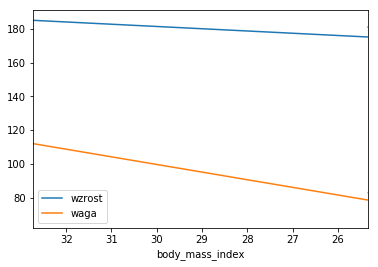

In [95]:
people.plot(kind = "line", x = "body_mass_index", y = ["wzrost", "waga"])
plt.show()

Możesz przekazać dodatkowe argumenty obsługiwane przez funkcje modułu matplotlib. Na przykład jesteśmy w stanie stworzyć wykres punktowy i przekazać mu listę rozmiarów za pomocą argumentu `s` stanowiącego część funkcji `scatter()`:

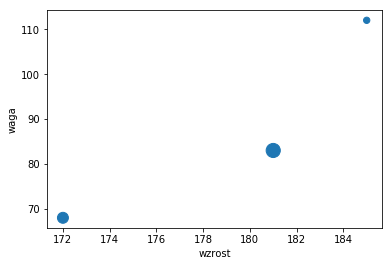

In [96]:
people.plot(kind = "scatter", x = "wzrost", y = "waga", s=[40, 120, 200])
plt.show()

Również w tym przypadku istnieje zbyt dużo opcji, aby je tu wszystkie wymienić: najlepszym rozwiązaniem jest przejrzenie sekcji [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) w dokumentacji modułu pandas, znalezienie interesującego Cię wykresu i analiza jego przykładowego kodu.

## Działania na obiektach `DataFrame`
Obiekt `DataFrame` nie próbuje naśladować tablic NumPy, ale możemy wśród obydwu klas obiektów znaleźć pewne podobieństwa. Aby się o tym przekonać, stwórzmy najpierw obiekt `DataFrame`:

In [97]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["wrz", "paź", "lis"], index=["alicja","bob","karol","darwin"])
grades

,wrz,paź,lis
alicja,8,8,9
bob,10,9,9
karol,4,8,2
darwin,9,10,10


Możemy stosować funkcje matematyczne modułu NumPy wobec obiektu `DataFrame`; funkcja taka jest stosowana wględem wszystkich wartości:

In [98]:
np.sqrt(grades)

,wrz,paź,lis
alicja,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
karol,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


W analogiczny sposób dodanie pojedynczej wartości do obiektu `DataFrame` spowoduje jej dodanie do wszystkich elementów tego obiektu. Jest to tak zwane *rozgłaszanie*:

In [99]:
grades + 1

,wrz,paź,lis
alicja,9,9,10
bob,11,10,10
karol,5,9,3
darwin,10,11,11


To samo, oczywiście, dotyczy pozostałych operacji binarnych, zarówno arytmetycznych (`*`,`/`,`**`...), jak i warunkowych (`>`, `==`...):

In [100]:
grades >= 5

,wrz,paź,lis
alicja,True,True,True
bob,True,True,True
karol,False,True,False
darwin,True,True,True


Operacje agregujące, takie jak obliczanie wartości maksymalnej (`max`), sumy (`sum`) lub średniej (`mean`) obiektu `DataFrame`,  są stosowane wobec każdej kolumny, a w wyniku otrzymujemy obiekt `Series`:

In [101]:
grades.mean()

wrz    7.75
paź    8.75
lis    7.50
dtype: float64

Metoda `all` jest również operacją agregującą: sprawdza, czy wszystkie wszystkie wartości to `True` czy nie. Sprawdźmy, w jakich miesiącach uczniowe dostaję ocenę wyższą od `5`:

In [102]:
(grades > 5).all()

wrz    False
paź     True
lis    False
dtype: bool

W większości tych funkcji możemy wprawdzić dodatkowy parametr `axis`, pozwalający określać oś obiektu `DataFrame`, wzdłuż której mają być przeprowadzana operacje. Domyślnie jest wyznaczona oś `axis=0`, co oznacza, że operacja będzie przeprowadzana w pionie (po kolumnach). Możesz wyznaczyć wartość `axis=1`, aby operacje były wykonywane poziomo (po wierszach). Na przykład, sprawdźmy, którzy uczniowie mają wszystkie oceny wyższe od `5`:

In [103]:
(grades > 5).all(axis = 1)

alicja     True
bob        True
karol     False
darwin     True
dtype: bool

Metoda `any` zwraca wartość `True` jeśli dowolna wartość jest równa 1 (`True`). Zobaczmy, kto dostał przynajmniej jedną dziesiątkę:

In [104]:
(grades == 10).any(axis = 1)

alicja    False
bob        True
karol     False
darwin     True
dtype: bool

Jeśli dodasz obiekt `Series` do obiektu `DataFrame` (lub wykonasz dowolną inną operację binarną), moduł pandas spróbuje rozgłosić operację na wszystkie *wiersze* w obiekcie `DataFrame`. Działa to jedynie w przypadku, gdy obiekt `Series` ma taki sam rozmiar, jak wiersze obiektu `DataFrame`. Odejmijmy, na przykład, średnią obiektu `DataFrame` (obiekt `Series`) od obiektu `DataFrame`:

In [105]:
grades - grades.mean()  # równoznaczne wyrażeniu: grades - [7.75, 8.75, 7.50]

,wrz,paź,lis
alicja,0.25,-0.75,1.5
bob,2.25,0.25,1.5
karol,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Odjęliśmy `7,75` od wszystkich ocen otrzymanych we wrześniu, `8,75` od ocen z października i `7,50` od ocen z listopada. Jest to operacja równoznacza następującej operacji odejmowania:

In [106]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,wrz,paź,lis
alicja,7.75,8.75,7.5
bob,7.75,8.75,7.5
karol,7.75,8.75,7.5
darwin,7.75,8.75,7.5


Jeżeli chcesz odjąć średnią globalną od każdej oceny, możesz to wykonać w następujący sposób:

In [107]:
grades - grades.values.mean() # odejmuje średnią globalną (8,00) od wszystkich ocen

,wrz,paź,lis
alicja,0.0,0.0,1.0
bob,2.0,1.0,1.0
karol,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Automatyczne przydzielanie
Podobnie jak w przypadku obiektów `Series`, moduł pandas podczas przeprowadzania operacji na wielu obiektach `DataFrame`, auotmatycznie przydziela je na podstawie etykiety indeksu wiersza, lecz również nazw kolumn. Stwórzmy obiekt `DataFrame` zawierający dodatkowe punkty dla każdej osoby w przedziale od października do grudnia:

In [108]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["paź", "lis", "gru"], index=["bob","czesław", "darwin", "karol"])
bonus_points

,paź,lis,gru
bob,0.0,NaN,2.0
czesław,NaN,1.0,0.0
darwin,0.0,1.0,0.0
karol,3.0,3.0,0.0


In [109]:
grades + bonus_points

,gru,lis,paź,wrz
alicja,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
czesław,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN
karol,NaN,5.0,11.0,NaN


Wygląda na to, że dodawanie zadziałało w niektórych przypadkach, lecz teraz zbyt wiele elementów jest pustych. Wynika to z faktu, że trakcie przydzielania obiektów `DataFrame`, niektóre kolumny i rzędy były dostępne wyłącznie po jednej stronie, zatem po drugiej stronie były uznawane za brakujące (`NaN`). Dodanie wartości `NaN` do liczby daje w wyniku wartość `NaN`, stąd taki, a nie inny rezultat.

## Obsługa brakujących danych
Zajmowanie się brakującymi danymi jest często spotykaną czynnością podczas analizy rzeczywistych danych. Moduł Panda zawiera kilka narzędzi pozwalających zająć się nimi w odpowiedni sposób.
 
Spróbujmy rozwiązać powyższy problem. Możemy, na przykład, umieścić w miejscu brakujących danych same zera zamiast wartości `NaN`. Możemy zastąpić wartości `NaN` dowolną wartością za pomocą metody `fillna()`:

In [110]:
(grades + bonus_points).fillna(0)

,gru,lis,paź,wrz
alicja,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
czesław,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0
karol,0.0,5.0,11.0,0.0


To jednak trochę niesprawiedliwe, że wyznaczamy we wrześniu zerowe oceny. Być może powinniśmy zdecydować, że brakujące oceny brakującymi ocenami, ale brakujące punkty dodatkowe powinny zostać zastąpione zerami:

In [111]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "wrz", 0)
fixed_bonus_points.loc["alicja"] = 0
grades + fixed_bonus_points

,gru,lis,paź,wrz
alicja,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
czesław,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0
karol,NaN,5.0,11.0,4.0


Teraz jest znacznie lepiej: wygenerowaliśmy trochę danych, ale staraliśmy się to zrobić sprawiedliwie.

Innym sposobem radzenia sobie z brakującymi danymi jest interpolacja. Przyjrzyjmy się ponownie dodatkowym punktom:

In [112]:
bonus_points

,paź,lis,gru
bob,0.0,NaN,2.0
czesław,NaN,1.0,0.0
darwin,0.0,1.0,0.0
karol,3.0,3.0,0.0


Wywołajmy teraz metodę `interpolate`. Domyślnie interpolacja jest przeprowadzana pionowo (`axis=0`), sprawmy więc, żeby była wykonywana poziomo (`axis=1`):

In [113]:
bonus_points.interpolate(axis=1)

,paź,lis,gru
bob,0.0,1.0,2.0
czesław,NaN,1.0,0.0
darwin,0.0,1.0,0.0
karol,3.0,3.0,0.0


Bob nie dostał w październiku dodatkowych punktów, za to otrzymał dwa punkty w grudniu. Wykonując interpolację dla grudnia otrzymujemy wartość średnią - jeden punkt. Czesław otrzymał jeden punkt w listopadzie, nie wiemy jednak, jak wiele punktów zebrał we wrześniu, zatem nie możemy wykonać interpolacji i z tego powodu w październiku pozostaje tu brakującą wartość. Rozwiążemy ten problem wstawiając we wrześniu zero dodatkowych punktów tuż przed interpolacją.

In [114]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "wrz", 0)
better_bonus_points.loc["alicja"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,wrz,paź,lis,gru
bob,0.0,0.0,1.0,2.0
czesław,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
karol,0.0,3.0,3.0,0.0
alicja,0.0,0.0,0.0,0.0


Wspaniale, teraz wszędzie mamy rozsądną liczbę punktów. Sprawdźmy ostateczne oceny:

In [115]:
grades + better_bonus_points

,gru,lis,paź,wrz
alicja,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
czesław,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0
karol,NaN,5.0,11.0,4.0


Trochę irytujące, że kolumny miesięcy są tak pomieszane. Wynika to z faktu, że dodawane przez nas obiekty `DataFrame` nie mają doładnie takich samych kolumn (w obiekcie `grades` brakuje kolumny `"dec"`), zatem w celu zachowania przewidywalności moduł pandas umieszcza ostateczne kolumny w porządku alfabetycznym. Aby rozwiązać ten problem, możemy po prostu dodać brakującą kolumnę przed przeprowadzeniem interpolacji:

In [116]:
grades["gru"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,wrz,paź,lis,gru
alicja,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
czesław,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN
karol,4.0,11.0,5.0,NaN


Nie za wiele możemy zrobić z kwestią czesława i grudnia: jest na tyle kiepsko, że musimy wymyślać punkty dodatkowe, nie jesteśmy jednak w stanie zrobić tego samego z ocenami (chociaż niektórym nauczycielom pewnie to nie przeszkadza). Wywołajmy zatem metodę  `dropna()` w celu pozbycia się wierszy wypełnionych wartościami `NaN`:

In [117]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,wrz,paź,lis,gru
alicja,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
darwin,9.0,10.0,11.0,NaN
karol,4.0,11.0,5.0,NaN


Zróbmy to samo z kolumnami - wyznaczamy tym razem wartość `1` argumentu `axis`:

In [118]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,wrz,paź,lis
alicja,8.0,8.0,9.0
bob,10.0,9.0,10.0
darwin,9.0,10.0,11.0
karol,4.0,11.0,5.0


## Agregacja za pomocą funkcji `groupby`
Moduł pandas, podobnie jak język SQL, pozwala tworzyć grupy danych, wobec których są przeprowadzane poszczególne obliczenia.

Najpierw wstawmy dodatkowe informacje na temat każdej osoby, dzięki czemu będziemy w stanie je pogrupować, a następnie wróćmy do obiektu `final_grades` i przekonajmy się, co się dzieje z wartościami `NaN`:

In [119]:
final_grades["zainteresowania"] = ["Rowery", "Taniec", np.nan, "Taniec", "Rowery"]
final_grades

,wrz,paź,lis,gru,zainteresowania
alicja,8.0,8.0,9.0,NaN,Rowery
bob,10.0,9.0,10.0,NaN,Taniec
czesław,NaN,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN,Taniec
karol,4.0,11.0,5.0,NaN,Rowery


Pogrupujmy teraz dane w tym obiekcie `DataFrame` pod względem zainteresowań:

In [120]:
grouped_grades = final_grades.groupby("zainteresowania")
grouped_grades

Jesteśmy gotowi obliczyć średnią ocenę dla każdego zainteresowania:

In [121]:
grouped_grades.mean()

,wrz,paź,lis,gru
zainteresowania,,,,
Rowery,6.0,9.5,7.0,NaN
Taniec,9.5,9.5,10.5,NaN


To było proste! Zwróć uwagę, że podczas obliczania średniej wartości `NaN` zostały po prostu pominięte.

## Tabele przestawne
Moduł pandas obsługuje [tabele przestawne](https://pl.wikipedia.org/wiki/Tabela_przestawna) w stylu arkuszy kalkulacyjnych, umożliwiające szybkie wyświetlanie danych podsumowujących. Stwórzmy najpierw prosty obiekt `DataFrame`:

In [122]:
bonus_points

,paź,lis,gru
bob,0.0,NaN,2.0
czesław,NaN,1.0,0.0
darwin,0.0,1.0,0.0
karol,3.0,3.0,0.0


In [123]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["imię", "miesiąc", "ocena"]
more_grades["punkty dodatkowe"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,imię,miesiąc,ocena,punkty dodatkowe
0,alicja,wrz,8.0,NaN
1,alicja,paź,8.0,NaN
2,alicja,lis,9.0,NaN
3,bob,wrz,10.0,0.0
4,bob,paź,9.0,NaN
5,bob,lis,10.0,2.0
6,darwin,wrz,9.0,3.0
7,darwin,paź,10.0,3.0
8,darwin,lis,11.0,0.0
9,karol,wrz,4.0,0.0


Teraz możemy wywołać funkcję `pd.pivot_table()` dla tego obiektu `DataFrame` i pogrupować dane względem kolumny `imię`. Domyślnie funkcja `pivot_table()` oblicza średnią każdej kolumny numerycznej:

In [124]:
pd.pivot_table(more_grades, index="imię")

,ocena,punkty dodatkowe
imię,,
alicja,8.333333,NaN
bob,9.666667,1.000000
darwin,10.000000,2.000000
karol,6.666667,0.333333


Możemy zmienić funkcję agregacji wyznaczając argument `aggfunc`; jesteśmy również w stanie określić listę kolumn, których wartości zostaną pogrupowane:

In [125]:
pd.pivot_table(more_grades, index="imię", values=["ocena","punkty dodatkowe"], aggfunc=np.max)

,ocena,punkty dodatkowe
imię,,
alicja,9.0,NaN
bob,10.0,2.0
darwin,11.0,3.0
karol,11.0,1.0


Możemy także wyznaczyć poziome grupowanie kolumn i żądać sumy wszystkich wartości w poszczególnych rzędach i kolumnach wyznaczając argument `margins=True`:

In [126]:
pd.pivot_table(more_grades, index="imię", values="ocena", columns="miesiąc", margins=True)

miesiąc,lis,paź,wrz,All
imię,,,,
alicja,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
darwin,11.00,10.0,9.00,10.000000
karol,5.00,11.0,4.00,6.666667
All,8.75,9.5,7.75,8.666667


Na koniec możemy określić wiele indeksów lub nazw kolumn, a moduł pandas stworzy wielopoziomowe indeksy:

In [127]:
pd.pivot_table(more_grades, index=("imię", "miesiąc"), margins=True)

ocena  punkty dodatkowe
imię   miesiąc                         
alicja lis       9.00               NaN
       paź       8.00               NaN
       wrz       8.00               NaN
bob    lis      10.00             2.000
       paź       9.00               NaN
       wrz      10.00             0.000
darwin lis      11.00             0.000
       paź      10.00             3.000
       wrz       9.00             3.000
karol  lis       5.00             0.000
       paź      11.00             1.000
       wrz       4.00             0.000
All              8.75             1.125

## Funkcje przeglądu
Podczas korzystania z dużych obiektów `DataFrames`, warto czasami móc szybko przejrzeć ich zawartość. Moduł pandas zawiera kilka odpowiednich funkcji. Stwórzmy najpierw duży obiekt `DataFrame` zawierający mieszankę wartości numerycznych, wartości `NaN` oraz wartości tekstowych. Zwróć uwagę, że notatnik Jupyter wyświetla tylko elementy brzegowe obiektu `DataFrame`:

In [128]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"jakiś_tekst", "Blabla")
large_df

,A,B,C,jakiś_tekst,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


Metoda `head()` zwraca pięć pierwszych wierszy:

In [129]:
large_df.head()

,A,B,C,jakiś_tekst,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Oczywiście, dostępna jest również funkcja `tail()` pozwalająca przejrzeć pięć ostatnich wierszy. Możemy zdefiniować dowolną liczbę interesujących nas wierszy:

In [130]:
large_df.tail(n=2)

,A,B,C,jakiś_tekst,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


Metoda `info()` wyświetla podsumowanie zawartości każdej kolumny:

In [131]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A              8823 non-null float64
B              8824 non-null float64
C              8824 non-null float64
jakiś_tekst    10000 non-null object
D              8824 non-null float64
E              8822 non-null float64
F              8824 non-null float64
G              8824 non-null float64
H              8822 non-null float64
I              8823 non-null float64
J              8823 non-null float64
K              8822 non-null float64
L              8824 non-null float64
M              8824 non-null float64
N              8822 non-null float64
O              8824 non-null float64
P              8824 non-null float64
Q              8824 non-null float64
R              8823 non-null float64
S              8824 non-null float64
T              8824 non-null float64
U              8824 non-null float64
V              8822 non-null float64
W              8824 non-null float64
X   

Dostępna jest także metoda `describe()` podsumowująca w elegancki sposób główne grupy wartości w każdej kolumnie: 
* `count`: liczba wartości niezerowych (niebędących wartościami `NaN`),
* `mean`: średnia wartości niezerowych,
* `std`: [odchylenie standardowe](https://pl.wikipedia.org/wiki/Odchylenie_standardowe) wartości niezerowych,
* `min`: wartości minimalne,
* `25%`, `50%`, `75%`: 25., 50. i 75. [percentyl](https://pl.wikipedia.org/wiki/Percentyl) wartości niezerowych
* `max`: wartości maksymalne.

In [132]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Zapisywanie i wczytywanie
Moduł pandas może zapisywać obiekty `DataFrame` w różnych postaciach, również w takich formatach plików, jak CSV, Excel, JSON, HTML i HDF5, a także do bazy danych SQL. Zademonstrujemy to na podstawie nowego obiektu `DataFrame`:

In [133]:
my_df = pd.DataFrame(
    [["Rowery", 68.5, 1985, np.nan], ["Taniec", 83.1, 1984, 3]], 
    columns=["zainteresowania","waga","rok urodzenia","dzieci"],
    index=["alicja", "bob"]
)
my_df

,zainteresowania,waga,rok urodzenia,dzieci
alicja,Rowery,68.5,1985,NaN
bob,Taniec,83.1,1984,3.0


## Zapisywanie
Zapiszmy ten obiekt w formatach CSV, HTML i JSON:

In [134]:
my_df.to_csv("obiekt_df.csv")
my_df.to_html("obiekt_df.html")
my_df.to_json("obiekt_df.json")

Gotowe! Zerknijmy teraz, jak wyglądają zapisane dane:

In [135]:
for filename in ("obiekt_df.csv", "obiekt_df.html", "obiekt_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# obiekt_df.csv
,zainteresowania,waga,rok urodzenia,dzieci
alicja,Rowery,68.5,1985,
bob,Taniec,83.1,1984,3.0


# obiekt_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>zainteresowania</th>
      <th>waga</th>
      <th>rok urodzenia</th>
      <th>dzieci</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alicja</th>
      <td>Rowery</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Taniec</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# obiekt_df.json
{"zainteresowania":{"alicja":"Rowery","bob":"Taniec"},"waga":{"alicja":68.5,"bob":83.1},"rok urodzenia":{"alicja":1985,"bob":1984},"dzieci":{"alicja":null,"bob":3.0}}



Zwróć uwagę, że indeks zostaje zachowany w pliku CSV jako pierwsza kolumna (nienazwana), znaczniki `<th>` w pliku HTML i jako klucze w formacie JSON.

Zapisywanie obiektu `<DataFrame>` w innych formatach wygląda bardzo podobnie, ale niektóre z nich wymagają zainstalowania dodatkowych bibliotek. Na przykład, do zapisania w formacie Excel potrzebna jest biblioteka openpyxl:

In [136]:
try:
    my_df.to_excel("obiekt_df.xlsx", sheet_name='Ludzie')
except ImportError as e:
    print(e)

## Wczytywanie
Wczytajmy teraz nasz plik CSV z powrotem do obiektu `DataFrame`:

In [137]:
my_df_loaded = pd.read_csv("obiekt_df.csv", index_col=0)
my_df_loaded

,zainteresowania,waga,rok urodzenia,dzieci
alicja,Rowery,68.5,1985,NaN
bob,Taniec,83.1,1984,3.0


Jak łatwo zgadnąć, dostępne są również podobne funkcje: `read_json`, `read_html`, `read_excel`. Jesteśmy także w stanie odczytywać dane bezpośrednio z poziomu internetu. Wczytajmy, na przykład, listę wszystkich miast znajdujących się w Stanach Zjednoczonych ze strony [simplemaps.com](http://simplemaps.com/):

In [140]:
us_cities = None
try:
    csv_url = "https://simplemaps.com/static/data/country-cities/us/us.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

HTTP Error 403: Forbidden


Dostępnych jest znacznie więcej opcji, zwłaszcza dotyczących formatu daty i godziny. Więcej szczegółów znajdziesz w [dokumentacji](http://pandas.pydata.org/pandas-docs/stable/io.html).

# Łączenie obiektów `DataFrame`

## Łączenie w stylu baz danych SQL
Jedną z najpotężniejszych możliwości modułu pandas jest zdolność wykonywania operacji łączenia obiektów `DataFrame` przypominających polecenia języka SQL. Dostępne są różne typy złączeń: wewnętrzne, lewe/prawe zewnętrzne oraz pełne. Zademonstrujemy to na dwóch prostych obiektach `DataFrame`:

In [141]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "Nowy Jork", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["stan", "miasto", "szer. geogr.", "dł. geogr."])
city_loc

,stan,miasto,szer. geogr.,dł. geogr.
0,CA,San Francisco,37.781334,-122.416728
1,NY,Nowy Jork,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [142]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "Kalifornia"],
        [8363710, "New York", "Nowy-Jork"],
        [413201, "Miami", "Floryda"],
        [2242193, "Houston", "Teksas"]
    ], index=[3,4,5,6], columns=["populacja", "miasto", "stan"])
city_pop

,populacja,miasto,stan
3,808976,San Francisco,Kalifornia
4,8363710,New York,Nowy-Jork
5,413201,Miami,Floryda
6,2242193,Houston,Teksas


Połączmy teraz te obiekty `DataFrame` za pomocą funkcji `merge()`:

In [144]:
pd.merge(left=city_loc, right=city_pop, on="miasto")

,stan_x,miasto,szer. geogr.,dł. geogr.,populacja,stan_y
0,CA,San Francisco,37.781334,-122.416728,808976,Kalifornia
1,FL,Miami,25.791100,-80.320733,413201,Floryda


Zwróć uwagę, że obydwa obiekty `DataFrame` zawierają kolumnę `stan`, zatem w rezultacie zostały przemianowane na `stan_x` i `stan_y`.

Zauważ także, że miasta Cleveland, Salt Lake City i Houston zostały pominięte, ponieważ nie występują w *obydwu* obiektach `DataFrame`. Jest to równoznaczne instrukcji `INNER JOIN` języka SQL. Jeśli chcesz skorzystać z operacji `FULL OUTER JOIN`, dzięki której żadne miasto nie jest pominięte i zostają dodane wartości `NaN`, to musisz wyznaczyć atrybut `how="outer"`:

In [145]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="miasto", how="outer")
all_cities

,stan_x,miasto,szer. geogr.,dł. geogr.,populacja,stan_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,Kalifornia
1,NY,Nowy Jork,40.705649,-74.008344,NaN,NaN
2,FL,Miami,25.791100,-80.320733,413201.0,Floryda
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,New York,NaN,NaN,8363710.0,Nowy-Jork
6,NaN,Houston,NaN,NaN,2242193.0,Teksas


Oczywiście, za pomocą atrybutu `how="left"` możemy wyznaczyć `LEFT OUTER JOIN`: w jego wyniku będą wyświetlane wyłącznie miasta obecne w pierwszym obiekcie `DataFrame`. Na drodze analogii dzięki atrybutowi `how="right"` będą brane pod uwagę tylko miasta z prawego obiektu `DataFrame`. Na przykład:

In [146]:
pd.merge(left=city_loc, right=city_pop, on="miasto", how="right")

,stan_x,miasto,szer. geogr.,dł. geogr.,populacja,stan_y
0,CA,San Francisco,37.781334,-122.416728,808976,Kalifornia
1,FL,Miami,25.791100,-80.320733,413201,Floryda
2,NaN,New York,NaN,NaN,8363710,Nowy-Jork
3,NaN,Houston,NaN,NaN,2242193,Teksas


Jeżeli klucz, za pomocą którego wykonujemy łączenie, stanowi w rzeczywistości indeks jednego (lub obydwu) obiektu `DataFrame`, musimy użyć atrybutu `left_index=True` i/lub `right_index=True`. Jeśli nazwy kolumn nie są takie same, należy skorzystać z atrybutów `left_on` i `right_on`. Na przykład:

In [148]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["populacja", "name", "stan"]
pd.merge(left=city_loc, right=city_pop2, left_on="miasto", right_on="name")

,stan_x,miasto,szer. geogr.,dł. geogr.,populacja,name,stan_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,Kalifornia
1,FL,Miami,25.791100,-80.320733,413201,Miami,Floryda


## Konkatenacja
Zamiast łączyć obiekty `DataFrame`, możemy wykonać ich konkatenację. Do tego służy funkcja `concat()`:

In [149]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,dł. geogr.,miasto,populacja,stan,szer. geogr.
0,-122.416728,San Francisco,NaN,CA,37.781334
1,-74.008344,Nowy Jork,NaN,NY,40.705649
2,-80.320733,Miami,NaN,FL,25.791100
3,-81.739791,Cleveland,NaN,OH,41.473508
4,-111.896657,Salt Lake City,NaN,UT,40.755851
3,NaN,San Francisco,808976.0,Kalifornia,NaN
4,NaN,New York,8363710.0,Nowy-Jork,NaN
5,NaN,Miami,413201.0,Floryda,NaN
6,NaN,Houston,2242193.0,Teksas,NaN


Zwróć uwagę, że ta operacja powiązała dane poziomo (po kolumnach), ale nie pionowo (po wierszach). W tym przykładzie otrzymujemy wiele wierszy mających ten sam indeks (tj. 3). Moduł pandas radzi sobie z tym całkiem wdzięcznie:

In [150]:
result_concat.loc[3]

,dł. geogr.,miasto,populacja,stan,szer. geogr.
3,-81.739791,Cleveland,NaN,OH,41.473508
3,NaN,San Francisco,808976.0,Kalifornia,NaN


Ewentualnie możemy po prostu zignorować indeks:

In [151]:
pd.concat([city_loc, city_pop], ignore_index=True)

,dł. geogr.,miasto,populacja,stan,szer. geogr.
0,-122.416728,San Francisco,NaN,CA,37.781334
1,-74.008344,Nowy Jork,NaN,NY,40.705649
2,-80.320733,Miami,NaN,FL,25.791100
3,-81.739791,Cleveland,NaN,OH,41.473508
4,-111.896657,Salt Lake City,NaN,UT,40.755851
5,NaN,San Francisco,808976.0,Kalifornia,NaN
6,NaN,New York,8363710.0,Nowy-Jork,NaN
7,NaN,Miami,413201.0,Floryda,NaN
8,NaN,Houston,2242193.0,Teksas,NaN


Zwróć uwagę, że jeżeli dana kolumna nie istnieje w obiekcie `DataFrame`, zachowuje się tak, jakby była wypełniona wartościami `NaN`. Jeśli wyznaczymy atrybut `join="inner"`, to będą zwracane wyłącznie kolumny występujące w *obydwu* obiektach `DataFrame`:

In [152]:
pd.concat([city_loc, city_pop], join="inner")

,miasto,stan
0,San Francisco,CA
1,Nowy Jork,NY
2,Miami,FL
3,Cleveland,OH
4,Salt Lake City,UT
3,San Francisco,Kalifornia
4,New York,Nowy-Jork
5,Miami,Floryda
6,Houston,Teksas


Wyznaczając atrybut `axis=1` możemy przeprowadzać konkatenację poziomą:

In [153]:
pd.concat([city_loc, city_pop], axis=1)

,stan,miasto,szer. geogr.,dł. geogr.,populacja,miasto,stan
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,Nowy Jork,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,Kalifornia
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,Nowy-Jork
5,NaN,NaN,NaN,NaN,413201.0,Miami,Floryda
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Teksas


W tym przypadku operacja ta nie ma zupełnie sensu, ponieważ indeksy nie są do siebie zbyt dobrze dopasowane (tzn. miasta Cleveland i San Francisco znajdują się w tym samym wierszu, ponieważ mają etykietę indeksu `3`). Zatem zmieńmy indeksy obiektów  `DataFrame` względem nazw miast zanim przeprowadzimy konkatenację:

In [154]:
pd.concat([city_loc.set_index("miasto"), city_pop.set_index("miasto")], axis=1)

,stan,szer. geogr.,dł. geogr.,populacja,stan
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Teksas
Miami,FL,25.791100,-80.320733,413201.0,Floryda
New York,NaN,NaN,NaN,8363710.0,Nowy-Jork
Nowy Jork,NY,40.705649,-74.008344,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
San Francisco,CA,37.781334,-122.416728,808976.0,Kalifornia


Proces ten bardzo przypomina instrukcję `FULL OUTER JOIN`, oprócz tego, że kolumny `stan` nie zostały przemianowane na `stan_x` i `stan_y`, a kolumna `miasto` stała się indeksem.

Metoda `append()` stanowi przydatny skrót do przeprowadzania konkatenacji pionowej:

In [155]:
city_loc.append(city_pop)

,dł. geogr.,miasto,populacja,stan,szer. geogr.
0,-122.416728,San Francisco,NaN,CA,37.781334
1,-74.008344,Nowy Jork,NaN,NY,40.705649
2,-80.320733,Miami,NaN,FL,25.791100
3,-81.739791,Cleveland,NaN,OH,41.473508
4,-111.896657,Salt Lake City,NaN,UT,40.755851
3,NaN,San Francisco,808976.0,Kalifornia,NaN
4,NaN,New York,8363710.0,Nowy-Jork,NaN
5,NaN,Miami,413201.0,Floryda,NaN
6,NaN,Houston,2242193.0,Teksas,NaN


Jak zwykle w przypadku modułu pandas metoda `append()` w istocie *nie* modyfikuje obiektu `city_loc`: przetwarza ona kopię i zwraca jej zmodyfikowaną wersję.

# Kategorie
Całkiem często korzystamy z wartości reprezentujących kategorie, np. `1` - samica i `2` - samiec, albo `"A"` - dobre, `"B"` - przeciętne, `"C"` - złe. Te wartości kategorialne mogą być ciężkie do odczytywania i nużące do przetwarzania, na szczęście moduł pandas, jak zwykle, ułatwia nam życie. Możemy przekonać się o tym dodając do utworzonego wcześniej obiektu `city_pop` kolumnę symbolizującą kategorię:

In [156]:
city_eco = city_pop.copy()
city_eco["kod_eko"] = [17, 17, 34, 20]
city_eco

,populacja,miasto,stan,kod_eko
3,808976,San Francisco,Kalifornia,17
4,8363710,New York,Nowy-Jork,17
5,413201,Miami,Floryda,34
6,2242193,Houston,Teksas,20


Obecnie kolumna `kod_eko` zawiera niezrozumiałe dla nas wartości liczbowe. Zróbmy coś z tym. Najpierw stworzymy nową kolumnę kategorialną bazującą na danych zawartych w kolumnie `kod_eko`:

In [157]:
city_eco["ekonomia"] = city_eco["kod_eko"].astype('category')
city_eco["ekonomia"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

Teraz możemy nadać każdej kategorii jakąś znaczącą nazwę:

In [158]:
city_eco["ekonomia"].cat.categories = ["Finanse", "Energia", "Turystyka"]
city_eco

,populacja,miasto,stan,kod_eko,ekonomia
3,808976,San Francisco,Kalifornia,17,Finanse
4,8363710,New York,Nowy-Jork,17,Finanse
5,413201,Miami,Floryda,34,Turystyka
6,2242193,Houston,Teksas,20,Energia


Zwróć uwagę, że wartości kategorialne zostały posortowane w porządku kategorialnym, a *nie* alfabetycznym:

In [160]:
city_eco.sort_values(by="ekonomia", ascending=False)

,populacja,miasto,stan,kod_eko,ekonomia
5,413201,Miami,Floryda,34,Turystyka
6,2242193,Houston,Teksas,20,Energia
4,8363710,New York,Nowy-Jork,17,Finanse
3,808976,San Francisco,Kalifornia,17,Finanse


# Co dalej?
Jak już pewnie zdążyłaś/zdążyłeś zauważyć, moduł pandas jest całkiem sporą biblioteką zawierają *mnóstwo* funkcji. Omówiliśmy wiele z nich, ale przed Tobą jest jeszcze wiele do odkrycia. Prawdopodobnie najlepszym sposobem nauki jest umorusanie sobie samodzielnie rąk za pomocą rzeczywistych danych. Warto również zapoznać się z doskonałą [dokumentacją](http://pandas.pydata.org/pandas-docs/stable/index.html) modułu pandas, zwłaszcza z [podręcznikiem](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).